# *Customer Churn Prediction*

**Problem Statement:**

In the dynamic landscape of telecommunications, minimizing customer attrition is crucial for sustained business success. Customer attrition, also known as churn, represents the loss of clients or customers, and it poses a significant challenge for telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services. Recognizing the financial implications of losing customers, these sectors prioritize customer attrition analysis as a key business metric. The cost of retaining an existing customer is substantially lower than acquiring a new one, making it imperative for companies to employ effective strategies for customer retention.

To address this challenge, we aim to undertake a comprehensive Customer Churn Prediction project in the telecom sector. This project involves leveraging predictive analytics and building robust churn prediction models to assess the propensity of customers to churn. The objective is to develop a model capable of identifying potential defectors within the customer base, enabling focused and efficient customer retention marketing programs. By understanding the factors influencing customer churn, we aim to empower telecom companies with insights to proactively retain customers and enhance their overall lifetime value.

**Project Overview:**

1. **Customer Survival Analysis:**
   - Conduct a thorough analysis of customer survival patterns within the telecom business.
   - Identify key factors contributing to customer attrition.
   - Explore time-dependent trends to understand when customers are most likely to churn.

2. **Churn Prediction Model:**
   - Develop predictive models using advanced analytics and machine learning techniques.
   - Utilize churn prediction models to assess the risk of churn for individual customers.
   - Generate a prioritized list of potential defectors to optimize resource allocation for retention efforts.

3. **App Development:**
   - Create a user-friendly app for telecom companies to assess and predict customer churn.
   - Incorporate an intuitive interface for exploring individual customer profiles and predicting their likelihood to churn.
   - Provide actionable insights to facilitate targeted retention strategies.

4. **Lifetime Value Estimation:**
   - Develop a methodology to estimate the expected lifetime value of individual customers.
   - Incorporate factors such as usage patterns, customer behavior, and response to retention efforts.
   - Enable telecom companies to prioritize efforts on customers with the highest potential lifetime value.

5. **Customer Feedback Analysis:**
   - Implement mechanisms to collect and analyze customer feedback.
   - Incorporate customer feedback into the churn prediction model to enhance accuracy.
   - Identify specific reasons for churn and provide actionable recommendations for improvement.

By successfully executing this project, we aim to empower telecom companies with a proactive approach to customer retention, ultimately increasing customer satisfaction, loyalty, and overall business profitability.

> ## Importing required libraries¶

In [1]:
import pandas as pd
import numpy as np

#EDA 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

> ## Load dataset

In [2]:
df =pd.read_csv('Telco_customer_churn.csv.xlsx - Telco_Churn.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


> ## Exploratory Data Analysis (EDA) 

In [3]:
# Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

 We do not need **'customer ID'** as it does not contribute significantly to predicting churn.

In [4]:
# Check missing values
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
# check duplicated observations
df.duplicated().sum() 

0

In [6]:
# Summary Statistics
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

### - Label 

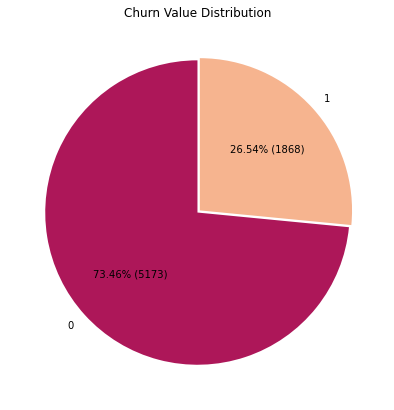

In [8]:
rocket_colors = [sns.color_palette('rocket')[2], sns.color_palette('rocket')[5]]
total_cnt = df['Churn Value'].count()
y = df["Churn Value"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(y, labels=y.index, explode = (0, 0.021) ,autopct=lambda p: f'{p:.2f}% ({int(p * total_cnt / 100)})', startangle=90, colors=rocket_colors)
plt.title('Churn Value Distribution')
plt.show()


The distribution is as follows:

- **Churn Value 0:** 5174 instances
- **Churn Value 1:** 1869 instances


> **Imbalance:** The distribution indicates that there is a class imbalance, with significantly more instances labeled as "Churn Value 0" (not churned) compared to "Churn Value 1" (churned). This class imbalance is important to consider when building predictive models, as it may impact model performance and should be addressed using techniques such as resampling or adjusting class weights during model training.


In [9]:
df[['Churn Label','Churn Value','Churn Score','Churn Reason']]

,Churn Label,Churn Value,Churn Score,Churn Reason
0,Yes,1,86,Competitor made better offer
1,Yes,1,67,Moved
2,Yes,1,86,Moved
3,Yes,1,84,Moved
4,Yes,1,89,Competitor had better devices
...,...,...,...,...
7038,No,0,45,NaN
7039,No,0,59,NaN
7040,No,0,71,NaN
7041,No,0,59,NaN


We aim to identify whether a customer churns or not. The specific reasons for churn will not be considered in this analysis. Therefore, **'Churn Reason'** will be excluded during the feature selection process to streamline the model for predicting churn.

In [10]:
df[['Churn Label','Churn Value']].duplicated(keep=False).sum() 

7043

- Both 'Churn Label' and 'Churn Value' contain identical information, representing whether a customer has churned or not.
- The values are encoded as 1 for 'Yes' and 0 for 'No'.
- To avoid redundancy, we will drop **'Churn Label'** and retain **'Churn Value'** in -Data Preparation- as the binary label for churn prediction.

### - Gender, Senior Citizen, Partner, Dependents

In [48]:
features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

> #### Univariate Analysis


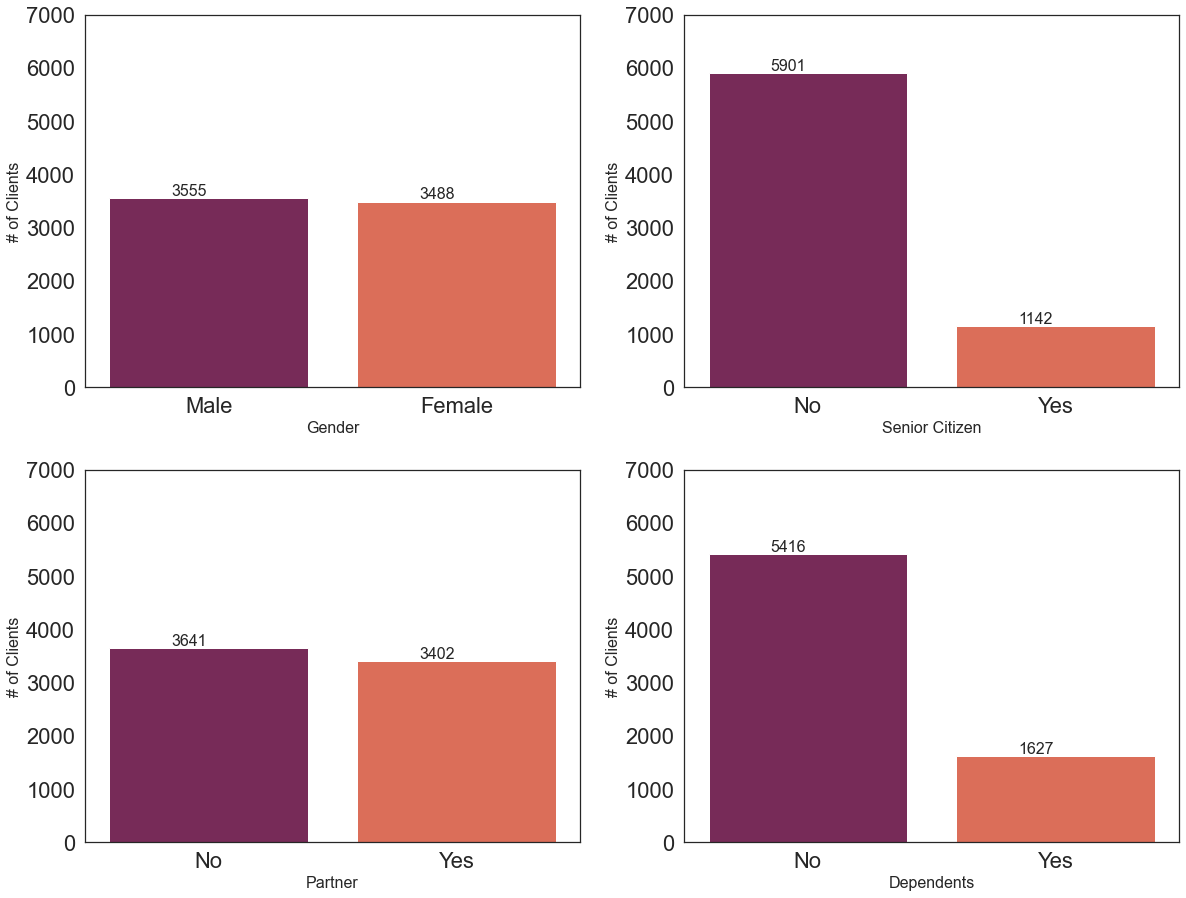

In [49]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 13))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols

    sns.countplot(data=df, x=feature, palette='rocket', ax=axes[row, col])

    axes[row, col].set_xlabel(feature, fontsize=16)
    axes[row, col].set_ylabel("# of Clients", fontsize=16)
    axes[row, col].set_ylim(0, 7000)

    for p in axes[row, col].patches:
        axes[row, col].annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() + 50),fontsize=16)

plt.tight_layout()
plt.show()


> #### Bivariate Analysis


Gender
Male      3555
Female    3488
Name: count, dtype: int64
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     5416
Yes    1627
Name: count, dtype: int64


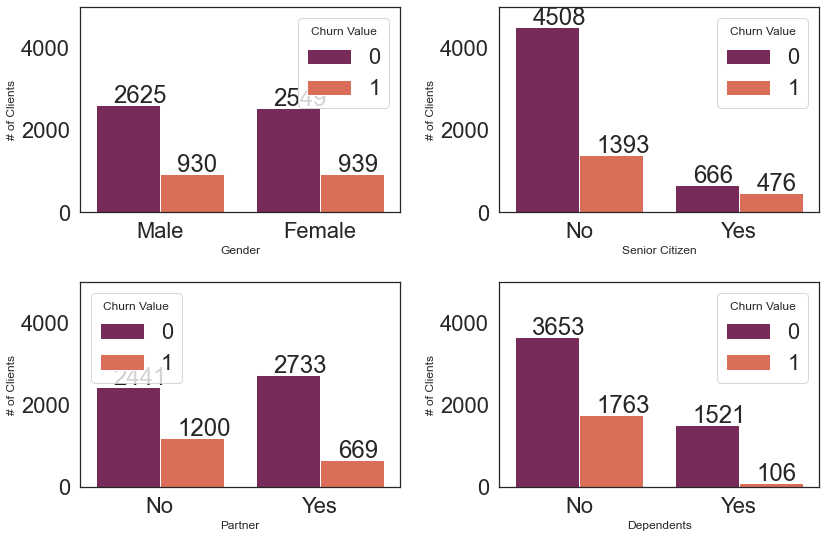

In [47]:

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, feature in enumerate(features):
    print(df[feature].value_counts())
    row = i // num_cols
    col = i % num_cols

    sns.countplot(data=df, x=feature, hue="Churn Value", palette='rocket', ax=axes[row, col])

    axes[row, col].set_xlabel(feature, fontsize=12)
    axes[row, col].set_ylabel("# of Clients", fontsize=12)
    axes[row, col].set_ylim(0, 5000)

    for p in axes[row, col].patches:
        axes[row, col].annotate((p.get_height()), (p.get_x() + 0.11, p.get_height() + 50))

plt.tight_layout()
plt.show()


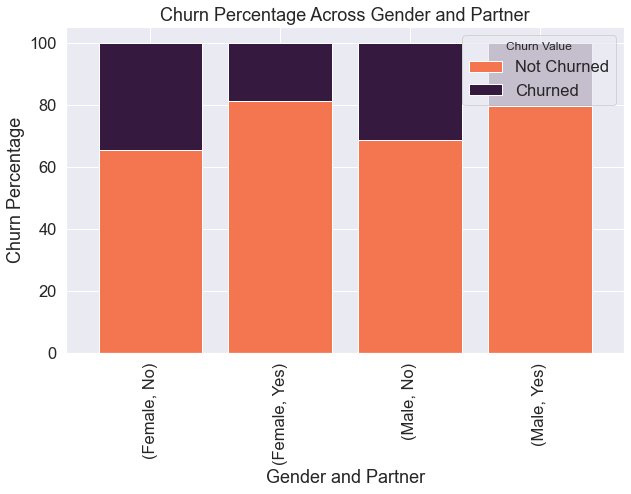

In [32]:
rocket_colors = [sns.color_palette('rocket')[4], sns.color_palette('rocket')[0]]

fig, ax = plt.subplots(figsize=(10, 6))

temp_df = (df.groupby(['Gender', 'Partner'])['Churn Value'].value_counts(normalize=True).unstack() * 100)
temp_df.plot(kind='bar', stacked=True, ax=ax, color=rocket_colors, width=0.8)


ax.set_xlabel('Gender and Partner')
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage Across Gender and Partner')

# Customize legend
ax.legend(['Not Churned', 'Churned'], title='Churn Value', loc='upper right')

# Show the plot
plt.show()


### - Count

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


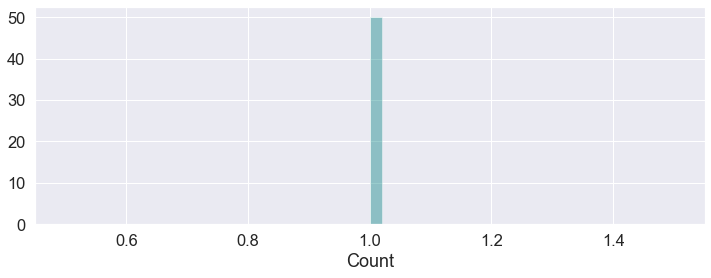

In [33]:
df['Count'].value_counts()
plt.figure(figsize=(12,4))
sns.distplot(df['Count'], color="teal")
plt.show()

**'Count'** is used in reporting/dashboarding to sum up the number of customers in a filtered set, so it does not contribute significantly to predicting churn.

### - Country , State , city 

In [34]:
for i in ['Country', 'State', 'City']:
    
    print( '\n' ,df[i].value_counts())


 Country
United States    7043
Name: count, dtype: int64

 State
California    7043
Name: count, dtype: int64

 City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64


all observations in the **'Country'** and **'State'**   columns have the same value, indicating that all customers are from the United States / California. As a result, these columns may not provide meaningful variation for our churn prediction model.


### - 'Lat Long', 'Latitude', 'Longitude'

In [35]:
df[['Lat Long', 'Latitude', 'Longitude']]

,Lat Long,Latitude,Longitude
0,"33.964131, -118.272783",33.964131,-118.272783
1,"34.059281, -118.30742",34.059281,-118.307420
2,"34.048013, -118.293953",34.048013,-118.293953
3,"34.062125, -118.315709",34.062125,-118.315709
4,"34.039224, -118.266293",34.039224,-118.266293
...,...,...,...
7038,"34.341737, -116.539416",34.341737,-116.539416
7039,"34.667815, -117.536183",34.667815,-117.536183
7040,"34.559882, -115.637164",34.559882,-115.637164
7041,"34.1678, -116.86433",34.167800,-116.864330


In [ ]:
df.columns

In [ ]:
df.info()

> ## Data Preparation:

as mentionned in eda phase so we will drop : 
   - id
   - Churn Label
   - Churn Reason
   - Count
   - Country
   - State
   

In [34]:
df.drop(['Count'], inplace = True, axis = 1)

In [19]:
df.drop(['CustomerID','Churn Label','Churn Reason','Count','Country','State'], inplace = True, axis = 1)

In [30]:
df.rename(columns={'Churn Value': 'Churn'}, inplace = True)

,Count,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,1,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372
3,1,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,1,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,45,5306
7039,1,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,59,2140
7040,1,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,71,5560
7041,1,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})